In [5]:
# This notebook corresponds to the Capstone Project of the
# IBM Data Science Program.
# Author: Leandro Recova
# Title: Car Severity Accident Prediction
# Dataset Source: https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv 

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [7]:
#Download the file
!wget -O CarAccident.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

--2020-08-29 20:27:05--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73917638 (70M) [text/csv]
Saving to: ‘CarAccident.csv’

CarAccident.csv     100%[===================>]  70.49M  21.7MB/s    in 3.3s    

2020-08-29 20:27:08 (21.1 MB/s) - ‘CarAccident.csv’ saved [73917638/73917638]



In [8]:
# Store the file in a panda dataset
df = pd.read_csv("CarAccident.csv")



/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
#Let's check the data information 
df.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


In [10]:

#Rename columns
dfMod = df.rename(columns = {'X': 'LONG', 'Y': 'LAT',}, inplace = False)
#dfMod.head(5)

#Explore some features
cdf = dfMod[['SEVERITYCODE','LONG','LAT','PERSONCOUNT','VEHCOUNT','JUNCTIONTYPE','WEATHER','ROADCOND','LIGHTCOND','SPEEDING']]

#Filter out the rows without latitude and longitude 
nan_value = float("NaN")
cdf.replace("", nan_value, inplace=True)
cdf.dropna(subset = ['LONG','LAT'], inplace=True)
cdf.head(14)



/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,SEVERITYCODE,LONG,LAT,PERSONCOUNT,VEHCOUNT,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,2,-122.323148,47.703140,2,2,At Intersection (intersection related),Overcast,Wet,Daylight,NaN
1,1,-122.347294,47.647172,2,2,Mid-Block (not related to intersection),Raining,Wet,Dark - Street Lights On,NaN
2,1,-122.334540,47.607871,4,3,Mid-Block (not related to intersection),Overcast,Dry,Daylight,NaN
3,1,-122.334803,47.604803,3,3,Mid-Block (not related to intersection),Clear,Dry,Daylight,NaN
4,2,-122.306426,47.545739,2,2,At Intersection (intersection related),Raining,Wet,Daylight,NaN
5,1,-122.387598,47.690575,2,2,At Intersection (intersection related),Clear,Dry,Daylight,NaN
6,1,-122.338485,47.618534,2,2,At Intersection (intersection related),Raining,Wet,Daylight,NaN
7,2,-122.320780,47.614076,3,1,At Intersection (intersection related),Clear,Dry,Daylight,NaN
8,1,-122.335930,47.611904,2,2,Mid-Block (not related to intersection),Clear,Dry,Daylight,NaN
9,2,-122.384700,47.528475,2,2,At Intersection (intersection related),Clear,Dry,Daylight,NaN


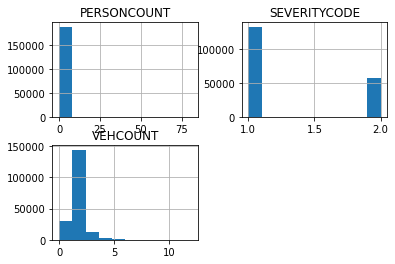

In [11]:
#Plot some of the features
viz = cdf[['SEVERITYCODE','PERSONCOUNT','VEHCOUNT']]
viz.hist()
plt.show()

In [63]:
#Create a function to add new columns to CDF dataframe and assign a code for each of the feature conditions in string format.

def EncodeRoadCond(col1,MyDF,myvalue,encodeValue,targetColumn): 
    col1mod = (MyDF[col1]==myvalue)
    MyDF.loc[col1mod, targetColumn]=encodeValue
    return(MyDF) 

def AddEncondingColumns(MyDF,SourceColumn,TargetColumn):
    #Check the type of road condition and store in MyListRoad
    MyList=MyDF[SourceColumn].value_counts().index.values
    nList = len(MyList)
    #Create a new column to encode the values. Set to 0 all initially.
    dfSize = MyDF.size
    MyDF[TargetColumn]=np.nan
    #Replace NAN to unknown
    MyDF[SourceColumn].fillna('Unknown', inplace=True)
    MyList=MyDF[SourceColumn].value_counts().index.values
    nList = len(MyList)
    for i in range(0,nList):
         
         MyDF = EncodeRoadCond(SourceColumn,MyDF,MyList[i],i,TargetColumn)
    return(MyDF)

#Copying the movie dataframe into a new one since we won't need to use the genre information in our first case.
CollisionWithRoadCond_df = cdf.copy()
  
CollisionWithRoadCond_df=AddEncondingColumns(CollisionWithRoadCond_df,'ROADCOND','ROADCONDID')
CollisionWithRoadCond_df=AddEncondingColumns(CollisionWithRoadCond_df,'WEATHER','WEATHERID')
CollisionWithRoadCond_df=AddEncondingColumns(CollisionWithRoadCond_df,'LIGHTCOND','LIGHTCONDID')
CollisionWithRoadCond_df=AddEncondingColumns(CollisionWithRoadCond_df,'SPEEDING','SPEEDINGID')
CollisionWithRoadCond_df=AddEncondingColumns(CollisionWithRoadCond_df,'JUNCTIONTYPE','JUNCTIONTYPEID')

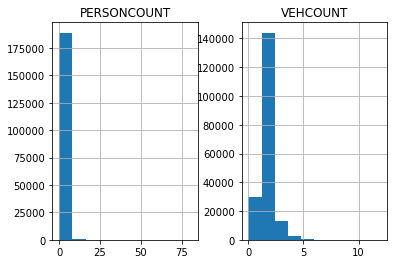

In [69]:
viz = CollisionWithRoadCond_df[['PERSONCOUNT','VEHCOUNT']]
viz.hist()
plt.show()

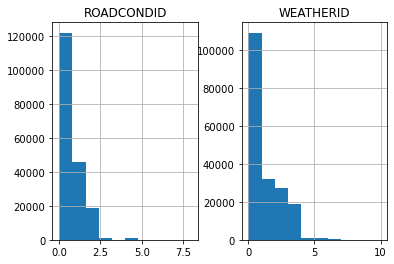

In [71]:
viz = CollisionWithRoadCond_df[['ROADCONDID','WEATHERID']]
viz.hist()
plt.show()

In [72]:
viz = CollisionWithRoadCond_df[['LIGHTCONDID','SPEEDINGID']]
viz.hist()
plt.show()

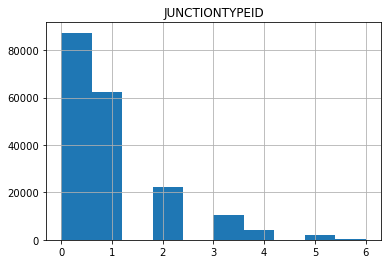

In [73]:
viz = CollisionWithRoadCond_df[['JUNCTIONTYPEID']]
viz.hist()
plt.show()

In [81]:
#Encode Weather 
CollisionWithRoadCond_df[['SEVERITYCODE','ROADCOND','LAT','LONG','PERSONCOUNT','VEHCOUNT','ROADCONDID','WEATHER','WEATHERID','LIGHTCOND','LIGHTCONDID','SPEEDING','SPEEDINGID','JUNCTIONTYPE','JUNCTIONTYPEID']].head(10)

,SEVERITYCODE,ROADCOND,LAT,LONG,PERSONCOUNT,VEHCOUNT,ROADCONDID,WEATHER,WEATHERID,LIGHTCOND,LIGHTCONDID,SPEEDING,SPEEDINGID,JUNCTIONTYPE,JUNCTIONTYPEID
0,2,Wet,47.703140,-122.323148,2,2,1.0,Overcast,2.0,Daylight,0.0,Unknown,0.0,At Intersection (intersection related),1.0
1,1,Wet,47.647172,-122.347294,2,2,1.0,Raining,1.0,Dark - Street Lights On,1.0,Unknown,0.0,Mid-Block (not related to intersection),0.0
2,1,Dry,47.607871,-122.334540,4,3,0.0,Overcast,2.0,Daylight,0.0,Unknown,0.0,Mid-Block (not related to intersection),0.0
3,1,Dry,47.604803,-122.334803,3,3,0.0,Clear,0.0,Daylight,0.0,Unknown,0.0,Mid-Block (not related to intersection),0.0
4,2,Wet,47.545739,-122.306426,2,2,1.0,Raining,1.0,Daylight,0.0,Unknown,0.0,At Intersection (intersection related),1.0
5,1,Dry,47.690575,-122.387598,2,2,0.0,Clear,0.0,Daylight,0.0,Unknown,0.0,At Intersection (intersection related),1.0
6,1,Wet,47.618534,-122.338485,2,2,1.0,Raining,1.0,Daylight,0.0,Unknown,0.0,At Intersection (intersection related),1.0
7,2,Dry,47.614076,-122.320780,3,1,0.0,Clear,0.0,Daylight,0.0,Unknown,0.0,At Intersection (intersection related),1.0
8,1,Dry,47.611904,-122.335930,2,2,0.0,Clear,0.0,Daylight,0.0,Unknown,0.0,Mid-Block (not related to intersection),0.0
9,2,Dry,47.528475,-122.384700,2,2,0.0,Clear,0.0,Daylight,0.0,Unknown,0.0,At Intersection (intersection related),1.0


In [157]:
#After enconding all columns, let's just keep the dataframe we need for the logistic regression.

finalDF2 = CollisionWithRoadCond_df[['SEVERITYCODE','LAT','LONG','PERSONCOUNT','VEHCOUNT','ROADCONDID','WEATHERID','LIGHTCONDID','SPEEDINGID','JUNCTIONTYPEID',]]
#Change the labeling of severity code. Subtract 1 to have labels 0 and 1.
finalDF=finalDF2-[1,0,0,0,0,0,0,0,0,0]

finalDF.head()



,SEVERITYCODE,LAT,LONG,PERSONCOUNT,VEHCOUNT,ROADCONDID,WEATHERID,LIGHTCONDID,SPEEDINGID,JUNCTIONTYPEID
0,1,47.703140,-122.323148,2,2,1.0,2.0,0.0,0.0,1.0
1,0,47.647172,-122.347294,2,2,1.0,1.0,1.0,0.0,0.0
2,0,47.607871,-122.334540,4,3,0.0,2.0,0.0,0.0,0.0
3,0,47.604803,-122.334803,3,3,0.0,0.0,0.0,0.0,0.0
4,1,47.545739,-122.306426,2,2,1.0,1.0,0.0,0.0,1.0


In [187]:
#Here we start our logistic regression processing.
#Define the Input array X
X = np.asarray(finalDF[['LAT','LONG','VEHCOUNT','ROADCONDID','WEATHERID','LIGHTCONDID','SPEEDINGID','JUNCTIONTYPEID']])
X[0:5]

array([[  47.7 , -122.32,    2.  ,    1.  ,    2.  ,    0.  ,    0.  ,
           1.  ],
       [  47.65, -122.35,    2.  ,    1.  ,    1.  ,    1.  ,    0.  ,
           0.  ],
       [  47.61, -122.33,    3.  ,    0.  ,    2.  ,    0.  ,    0.  ,
           0.  ],
       [  47.6 , -122.33,    3.  ,    0.  ,    0.  ,    0.  ,    0.  ,
           0.  ],
       [  47.55, -122.31,    2.  ,    1.  ,    1.  ,    0.  ,    0.  ,
           1.  ]])

In [188]:
#Define the array for output comparison
y = np.asarray(finalDF['SEVERITYCODE'])
y [0:15]

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0])

In [189]:
#lET'S NORMALIZE THE DATASET
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 1.49,  0.25,  0.12,  0.65,  1.03, -0.62, -0.22,  0.11],
       [ 0.49, -0.56,  0.12,  0.65,  0.16,  0.32, -0.22, -0.81],
       [-0.21, -0.13,  1.71, -0.63,  1.03, -0.62, -0.22, -0.81],
       [-0.26, -0.14,  1.71, -0.63, -0.72, -0.62, -0.22, -0.81],
       [-1.31,  0.8 ,  0.12,  0.65,  0.16, -0.62, -0.22,  0.11]])

In [223]:
#SPLIT THE TRAIN AND TEST SET
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (142004, 8) (142004,)
Test set: (47335, 8) (47335,)


In [224]:
#lET'S USE THE LOGISTIC REGRESSION WITH REGULARIZATION
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [225]:
#PREDICT THE TEST SET
yhat = LR.predict(X_test)
print(yhat[0:10])
print(y_test[0:10])

[0 0 0 0 0 0 0 0 0 0]
[1 0 0 1 0 0 1 0 0 0]


In [226]:
#Use the Jaccard Index.
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)


0.6940107742685117

In [227]:
#Confusion Matrix definitions - Used the same function as in ungraded problem of Machine Learning Module
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))



[[   97 14352]
 [  132 32754]]


Confusion matrix, without normalization
[[   97 14352]
 [  132 32754]]


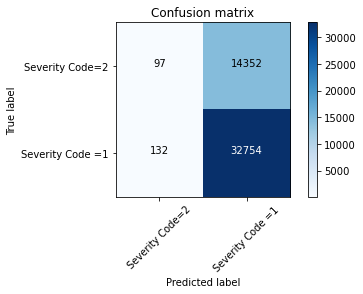

In [228]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Severity Code=2','Severity Code =1'],normalize= False,  title='Confusion matrix')

In [229]:
print (classification_report(y_test, yhat))


              precision    recall  f1-score   support

           0       0.70      1.00      0.82     32886
           1       0.42      0.01      0.01     14449

   micro avg       0.69      0.69      0.69     47335
   macro avg       0.56      0.50      0.42     47335
weighted avg       0.61      0.69      0.57     47335



In [230]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.599732094089027

In [231]:
yhat[0:15]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [232]:
y_test[0:15]

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])